# Importing Libraries

In [6]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

## Defining Constants

In [31]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

## Seperating and assgning the categories to each file

This can be done by seperating filename with a deliminator (.)
for example
> filename=cat.10.jpeg.

This filename can be seperated by 
> cat and the integer
> therefore if its a cat it can be categorised as category 0
and if the image is dog we can add categories like 1

In [17]:
filenames = os.listdir("C:\\Users\\Manish\\Downloads\\train\\train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

## Exploratory Data Analysis (EDA)

Since the files are stored in alphabetical order so it is obvious that the first will be the cat files (i.e in the head)

And the last columns will be the dog files in alphabetical Order

In [18]:
df.head()

filename  category
0     cat.0.jpg         0
1     cat.1.jpg         0
2    cat.10.jpg         0
3   cat.100.jpg         0
4  cat.1000.jpg         0

In [57]:
df.tail()

filename category
24995  dog.9995.jpg      dog
24996  dog.9996.jpg      dog
24997  dog.9997.jpg      dog
24998  dog.9998.jpg      dog
24999  dog.9999.jpg      dog

# ** It is to be kept in mind that shhuffling of the data is necessary as the files are arranged alphabetically**

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  25000 non-null  object
 1   category  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [20]:
print(df.tail())
print(df.head())

           filename  category
24995  dog.9995.jpg         1
24996  dog.9996.jpg         1
24997  dog.9997.jpg         1
24998  dog.9998.jpg         1
24999  dog.9999.jpg         1
       filename  category
0     cat.0.jpg         0
1     cat.1.jpg         0
2    cat.10.jpg         0
3   cat.100.jpg         0
4  cat.1000.jpg         0


## Displaying the sample 

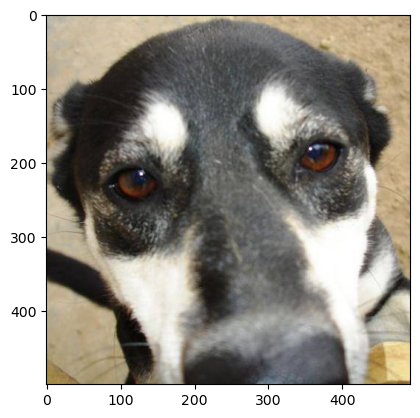

In [28]:
sample = random.choice(filenames)
image = load_img("C:\\Users\\Manish\\Downloads\\train\\train\\"+sample)
plt.imshow(image)

## Sample 2

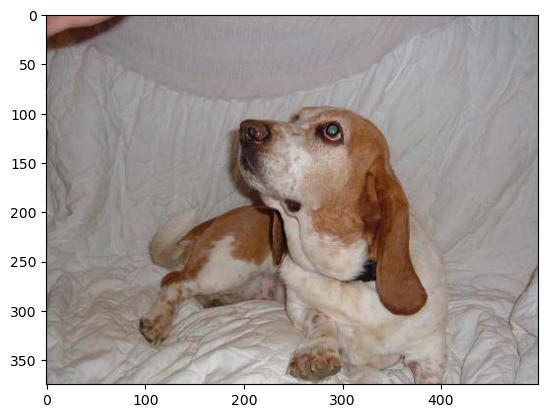

In [25]:
sample2 = random.choice(filenames)
image2 = load_img("C:\\Users\\Manish\\Downloads\\train\\train\\"+sample2)
plt.imshow(image2)

<Axes: xlabel='category'>

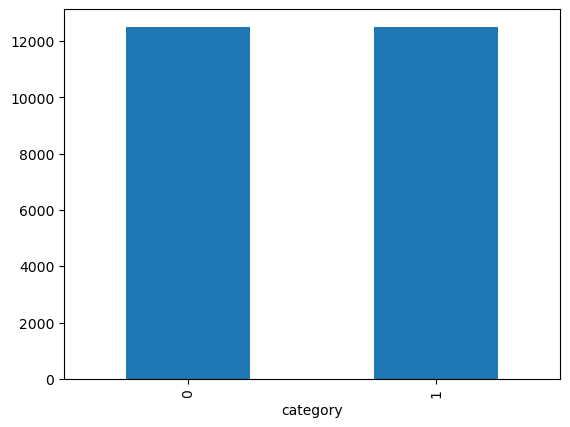

In [29]:
df['category'].value_counts().plot.bar()

## Building the model

In [32]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)       

## Callback

In [33]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [35]:
earlystop = EarlyStopping(patience=10)

In [36]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


In [52]:
callbacks = [earlystop, learning_rate_reduction]

## Preparing Data

In [ ]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [39]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42,shuffle=True)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<Axes: xlabel='category'>

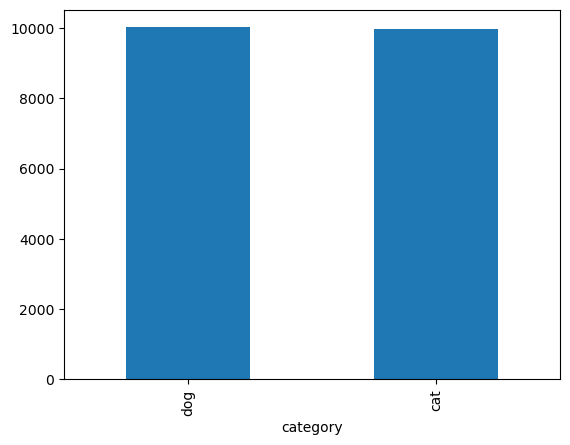

In [41]:
train_df['category'].value_counts().plot.bar()

<Axes: xlabel='category'>

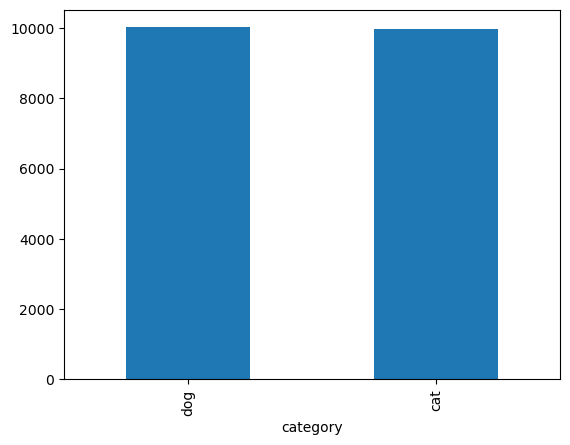

In [42]:
train_df['category'].value_counts().plot.bar()

In [43]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15


## Training Generator

In [45]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "C:\\Users\\Manish\\Downloads\\train\\train\\", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


## Validation Generator

In [47]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "C:\\Users\\Manish\\Downloads\\train\\train\\", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [49]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "C:\\Users\\Manish\\Downloads\\train\\train\\", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


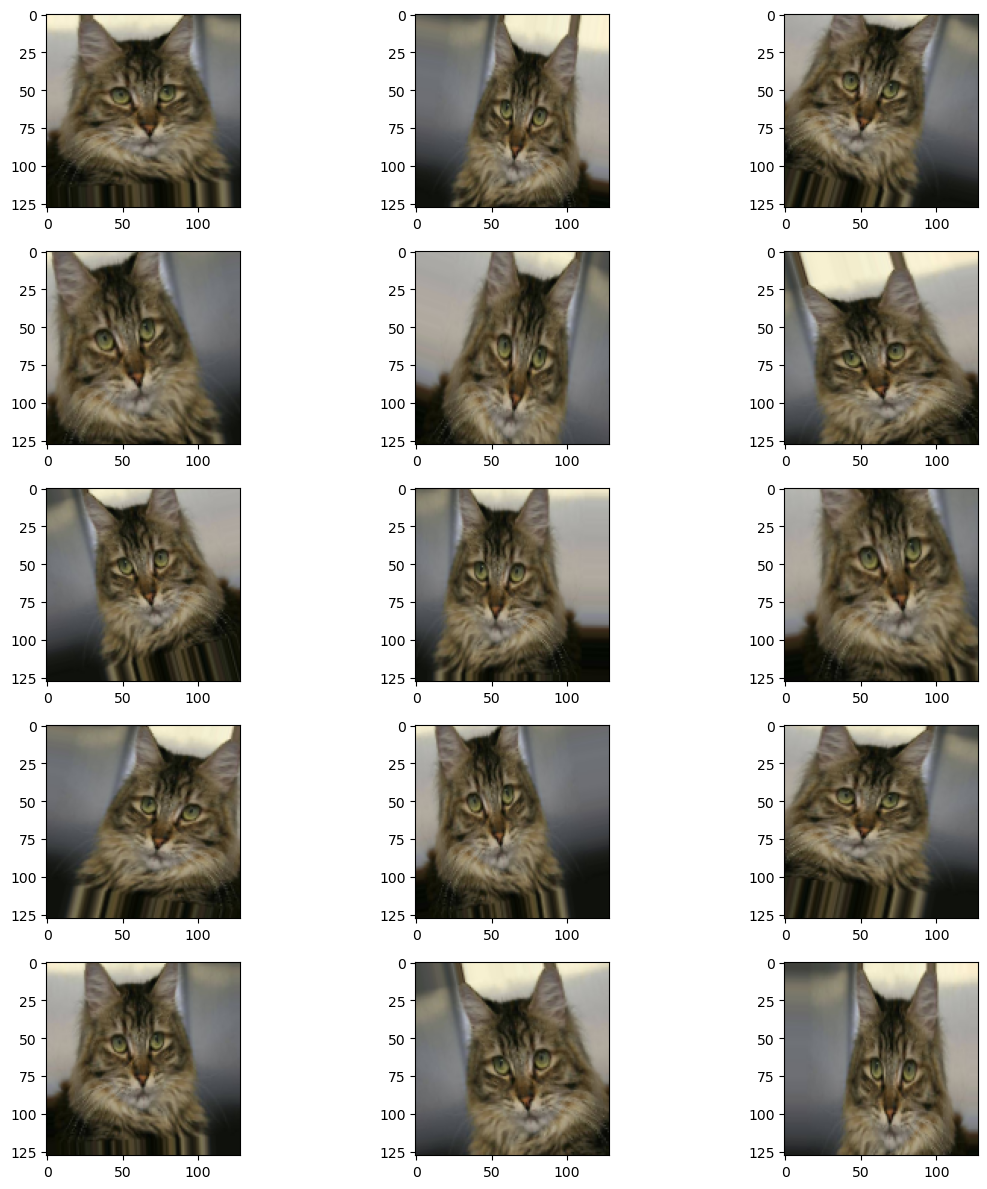

In [50]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

## Fitting the model

In [54]:
epochs=3 if FAST_RUN else 10
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/10


C:\Users\Manish\AppData\Local\Temp\ipykernel_19148\3023682299.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


1333/1333 [==============================] - 803s 602ms/step - loss: 0.4727 - accuracy: 0.7800 - val_loss: 0.5960 - val_accuracy: 0.7423 - lr: 0.0010
Epoch 2/10
1333/1333 [==============================] - 731s 548ms/step - loss: 0.4443 - accuracy: 0.7968 - val_loss: 0.4788 - val_accuracy: 0.7868 - lr: 0.0010
Epoch 3/10
1333/1333 [==============================] - 891s 668ms/step - loss: 0.4200 - accuracy: 0.8087 - val_loss: 0.3305 - val_accuracy: 0.8615 - lr: 0.0010
Epoch 4/10
1333/1333 [==============================] - 867s 650ms/step - loss: 0.3993 - accuracy: 0.8224 - val_loss: 0.3455 - val_accuracy: 0.8529 - lr: 0.0010
Epoch 5/10
1333/1333 [==============================] - 753s 565ms/step - loss: 0.3921 - accuracy: 0.8268 - val_loss: 0.5386 - val_accuracy: 0.7992 - lr: 0.0010
Epoch 6/10
1333/1333 [==============================] - 758s 568ms/step - loss: 0.3797 - accuracy: 0.8344 - val_loss: 0.3645 - val_accuracy: 0.8396 - lr: 0.0010
Epoch 7/10
1333/1333 [=======================

## Saving the model weights .

In [55]:
model.save_weights("model.h5")

## Virtualising the training 

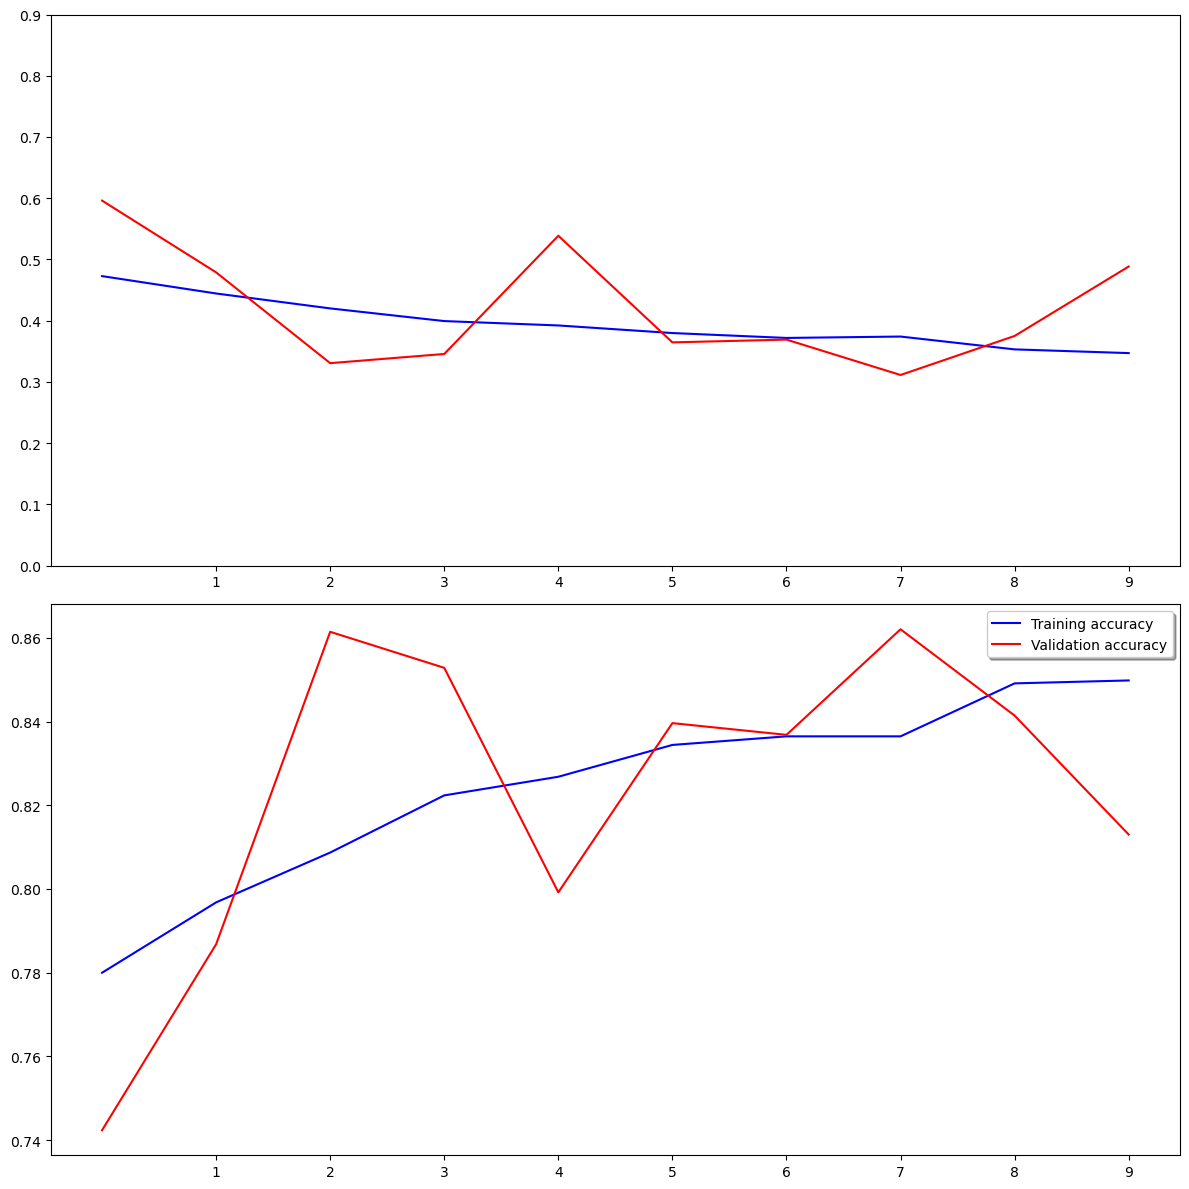

In [59]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()


# * The graph above can be inproved and be a smoothe curve if we increase the epoch instead of 10 *
##### Since this notebook is running on the local pc the resources and time is limited so the epoch has been limited 

In [60]:
test_filenames = os.listdir("C:\\Users\\Manish\\Downloads\\test\\test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

## Creating Test Generator

In [62]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "C:\\Users\\Manish\\Downloads\\test\\test1", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)


Found 12500 validated image filenames.


In [63]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

C:\Users\Manish\AppData\Local\Temp\ipykernel_19148\3090721588.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))


In [64]:
test_df['category'] = np.argmax(predict, axis=-1)

In [65]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [66]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

<Axes: xlabel='category'>

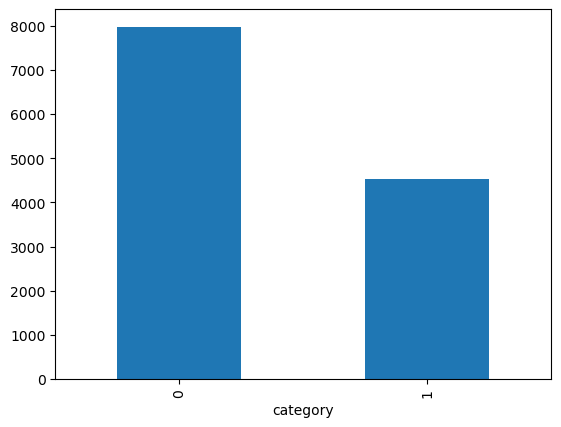

In [67]:
test_df['category'].value_counts().plot.bar()

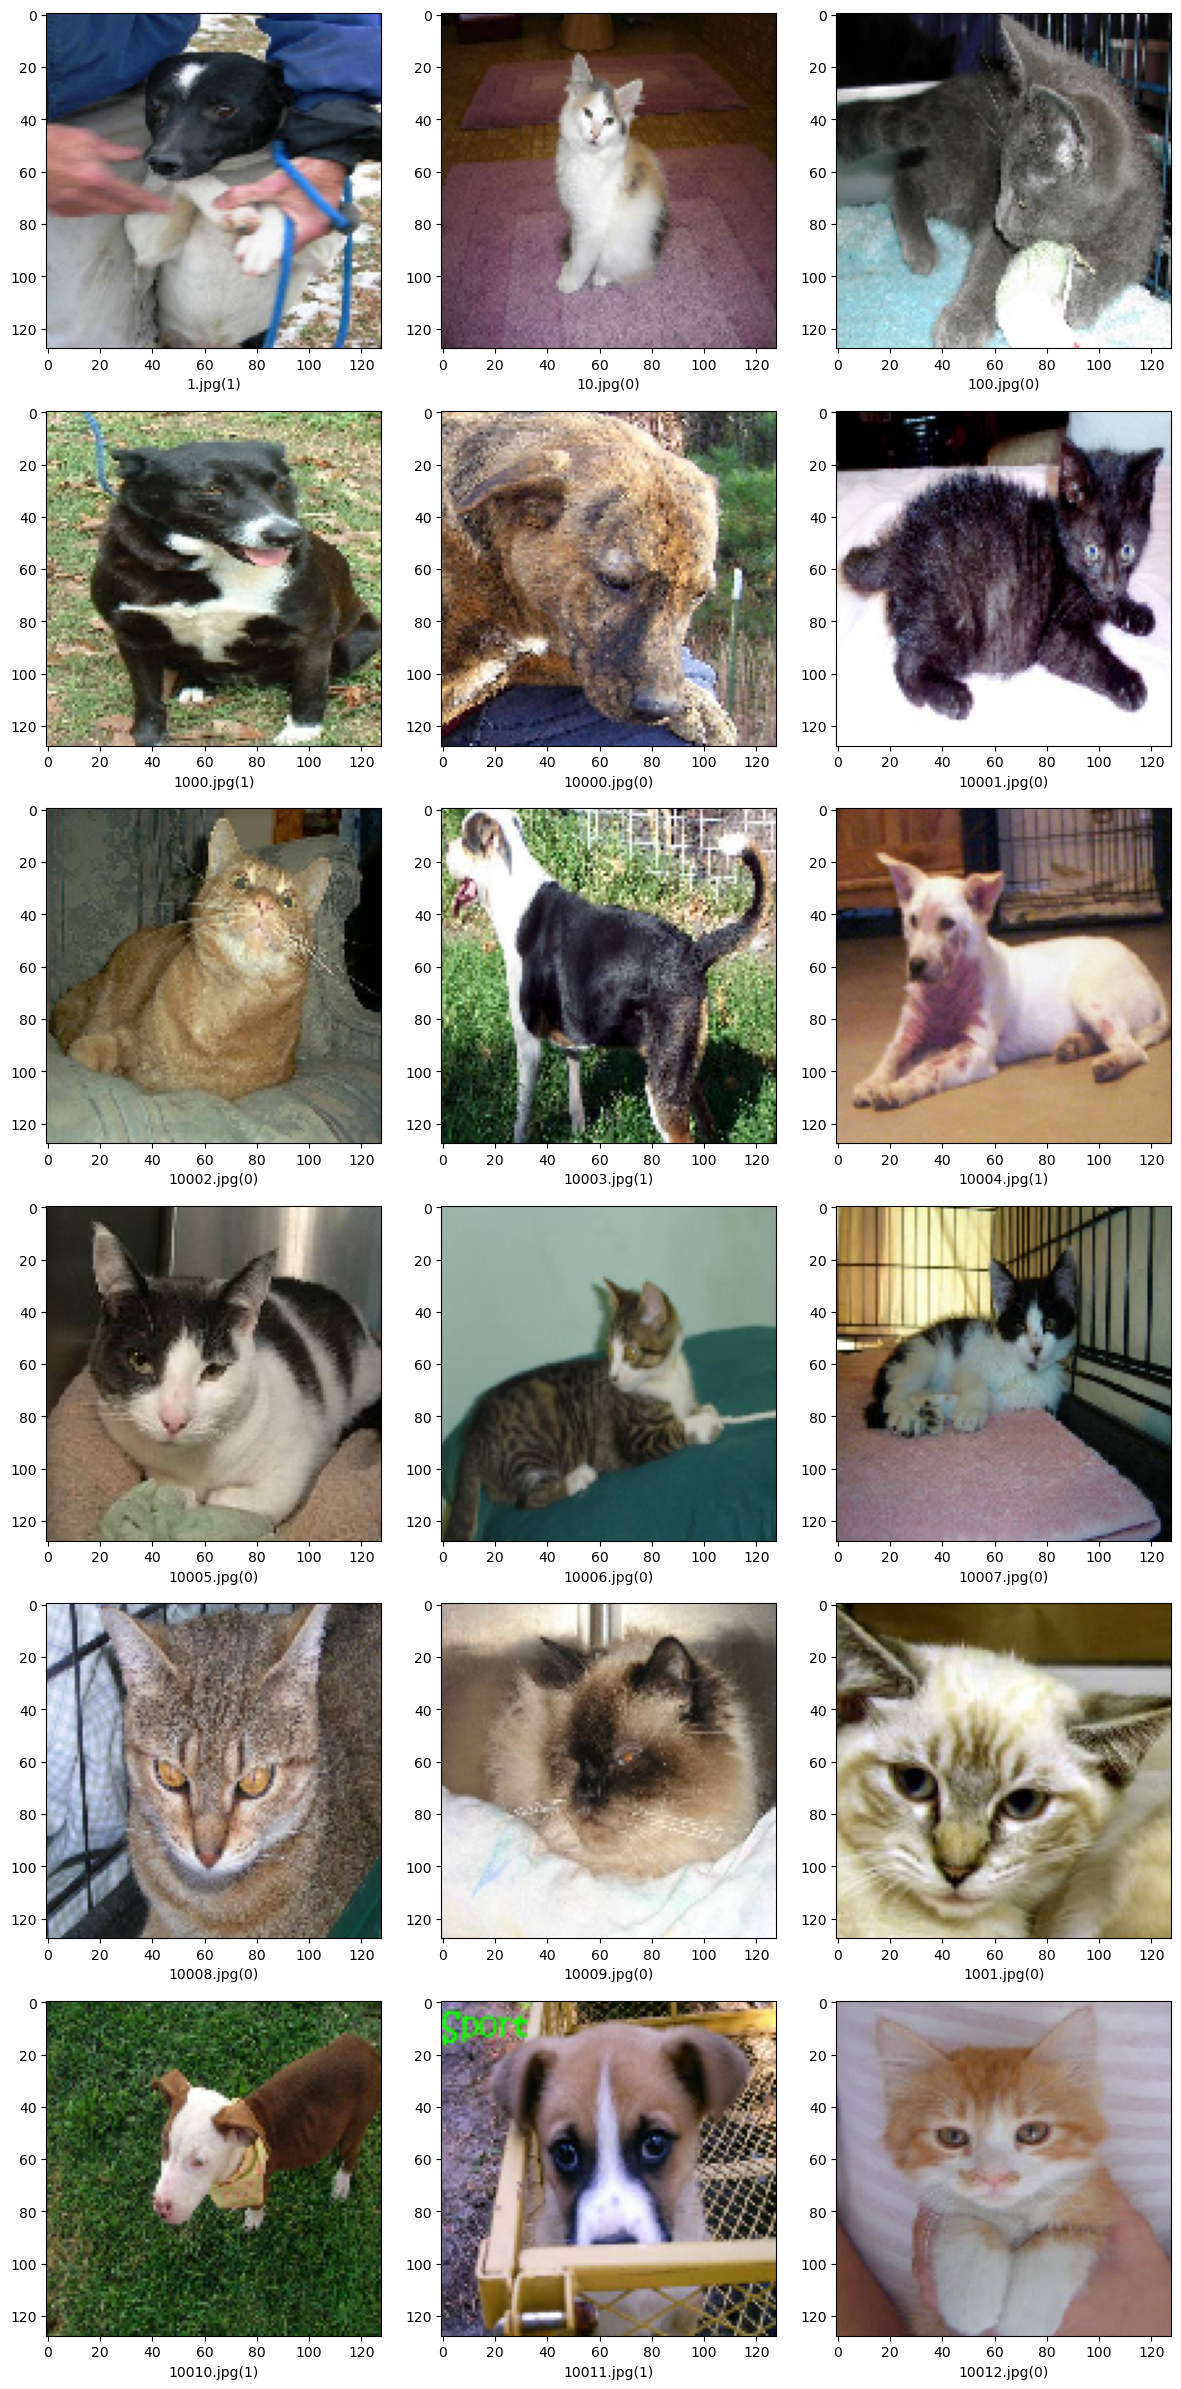

In [70]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("C:\\Users\\Manish\\Downloads\\test\\test1\\"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [71]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)

The results will be submitted to a csv file with th predicted values, and can be checked for results.